## **Importing Liberaries & Dataset**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings("ignore")

url = "https://raw.githubusercontent.com/modyreturn/Health_Care_Analysis/refs/heads/master/merged_data.csv"

df = pd.read_csv(url)

df.head()


,Archive_Date,Specialty_HIPE,Specialty_Name,Adult_Child,Age_Profile,Time_Bands,Total,Case_Type,Specialty Group
0,2018-02-28,0.0,Small Volume Specialities,Adult,16-64,0-3 Months,1,Day Case,Other
1,2018-02-28,0.0,Small Volume Specialities,Adult,16-64,0-3 Months,1,Day Case,Other
2,2018-02-28,0.0,Small Volume Specialities,Adult,16-64,9-12 Months,1,Inpatient,Other
3,2018-02-28,0.0,Small Volume Specialities,Adult,16-64,0-3 Months,1,Outpatient,Other
4,2018-02-28,0.0,Small Volume Specialities,Adult,16-64,0-3 Months,1,Outpatient,Other


## **Cleaning The Data**

In [17]:
# converting Archive_Date to datetime
df['Archive_Date'] = pd.to_datetime(df['Archive_Date'])
df['Year'] = df['Archive_Date'].dt.year
df['Month_Name'] = df['Archive_Date'].dt.month_name()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452991 entries, 0 to 452990
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Archive_Date     452991 non-null  datetime64[ns]
 1   Specialty_HIPE   452800 non-null  float64       
 2   Specialty_Name   452991 non-null  object        
 3   Adult_Child      452991 non-null  object        
 4   Age_Profile      452816 non-null  object        
 5   Time_Bands       452989 non-null  object        
 6   Total            452991 non-null  int64         
 7   Case_Type        452991 non-null  object        
 8   Specialty Group  452991 non-null  object        
 9   Year             452991 non-null  int32         
 10  Month_Name       452991 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(7)
memory usage: 36.3+ MB


In [18]:
df['Time_Bands'] = df['Time_Bands'].str.strip()
df['Age_Profile'] = df['Age_Profile'].str.strip()

In [ ]:
# I will use the following func to format the values on axis of the charts as needed
def millions_formatter(x, pos):
    if x >= 1_000_000:
        return f'{x*1.0/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x*1.0/1_000:.1f}K'
    else:
        return f'{x:.0f}'

# Apply formatter to the current plot
formatter = FuncFormatter(millions_formatter)

## **Exploratory Data Analysis (EDA):**

### **Statistic Summary**

In [19]:
# using describe() to get statistic summary for the data
df.describe(include=('all'))

,Archive_Date,Specialty_HIPE,Specialty_Name,Adult_Child,Age_Profile,Time_Bands,Total,Case_Type,Specialty Group,Year,Month_Name
count,452991,452800.000000,452991,452991,452816,452989,452991.000000,452991,452991,452991.000000,452991
unique,NaN,NaN,78,3,3,8,NaN,3,27,NaN,12
top,NaN,NaN,General Surgery,Adult,16-64,0-3 Months,NaN,Outpatient,General,NaN,March
freq,NaN,NaN,43634,368151,203354,93818,NaN,270281,76614,NaN,47110
mean,2019-09-09 18:57:46.892720640,2619.144576,NaN,NaN,NaN,NaN,54.390059,NaN,NaN,2019.181778,NaN
min,2018-01-31 00:00:00,0.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,2018.000000,NaN
25%,2018-10-31 00:00:00,1300.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,2018.000000,NaN
50%,2019-08-31 00:00:00,1900.000000,NaN,NaN,NaN,NaN,13.000000,NaN,NaN,2019.000000,NaN
75%,2020-06-30 00:00:00,2600.000000,NaN,NaN,NaN,NaN,53.000000,NaN,NaN,2020.000000,NaN
max,2021-03-31 00:00:00,9000.000000,NaN,NaN,NaN,NaN,4239.000000,NaN,NaN,2021.000000,NaN


### **Cases Over Time:**
-   Now let's analyze Day Cases, Inpatient Cases, and Outpatient Cases over time.




In [20]:
cases_over_time = df.groupby(['Month_Name', 'Case_Type'])['Total'].sum().reset_index()
cases_over_time['Month_Name'] = cases_over_time['Month_Name'].str[:3] # to abbreviate the month name to the first 3 letters

cases_over_time.head()

,Month_Name,Case_Type,Total
0,Apr,Day Case,168396
1,Apr,Inpatient,67712
2,Apr,Outpatient,1626611
3,Aug,Day Case,156239
4,Aug,Inpatient,64058


In [21]:
# here you can categorise and order Month_Name to plot
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
cases_over_time['Month_Name'] = pd.Categorical(cases_over_time['Month_Name'], categories=month_order, ordered=True)

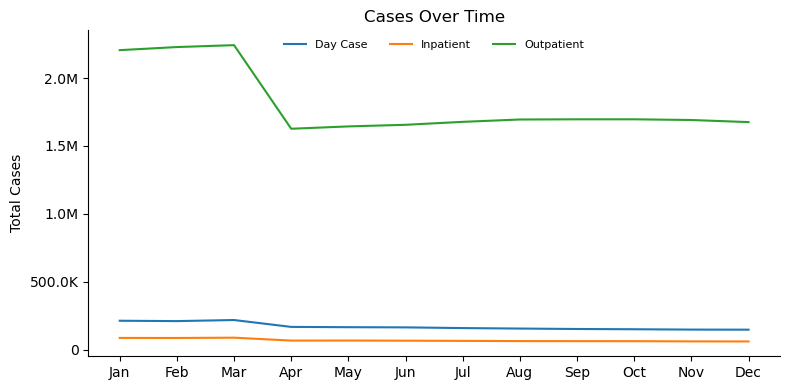

In [ ]:
plt.figure(figsize=(8, 4))

sns.lineplot(
    data=cases_over_time,
    x='Month_Name',
    y='Total',
    hue='Case_Type',
    palette='tab10'
)


plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Cases Over Time')
plt.xlabel('')
plt.ylabel('Total Cases')
plt.legend(ncols=3, loc='upper center', framealpha=False, fontsize=8)

sns.despine()
plt.tight_layout()
plt.show()


**Key Insights:**

-   Outpatient Cases
    - Outpatient volumes are **significantly higher** than other case types.
    - There is a **sharp decline between March and April**, followed by a stable trend.
    

-   Day Case
    - Relatively stable across the year with a small dip in April, which mirrors the outpatient drop (but on a smaller scale).

    -   This may suggest a system-wide effect in April (e.g., hospital capacity issues or a public holiday period)..


-   Inpatient Cases
    - Lowest and **most stable** volume.
    - Very minimal month-to-month variation — this could indicate inpatient services are less affected by external factors or operate on a constant baseline.

    ---




### **Cases Type Distributions:**
-   Let's see the distributions of Case Types

In [23]:
case_type_distribution = df['Case_Type'].value_counts().reset_index()
case_type_distribution.columns = ['Case_Type', 'Count']

case_type_distribution

,Case_Type,Count
0,Outpatient,270281
1,Day Case,110487
2,Inpatient,72223


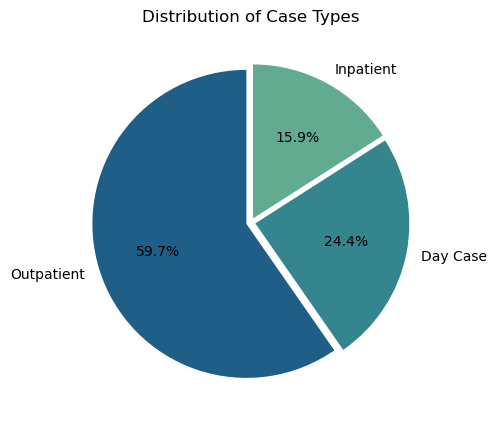

In [24]:
# Define the explode tuple dynamically
explode = [0.03] * len(case_type_distribution)

plt.figure(figsize=(10, 5))
plt.pie(
    case_type_distribution['Count'],
    labels=case_type_distribution['Case_Type'],
    colors=sns.color_palette('crest_r', n_colors=len(case_type_distribution)),
    autopct='%1.1f%%',
    startangle=90,
    explode=explode
)

plt.title("Distribution of Case Types")
plt.show()

**Key Insights**

-   Outpatient
    - Represents the **majority** of cases: **59.7%**.
    - Highlights the **dominance of non-admitted consultations** in the healthcare activity mix.
    - Indicates a likely emphasis on **preventive care, follow-ups, or minor procedures**.

-   Day Case
    - Accounts for **24.4%** of total cases.
    - Suggests a **significant number of procedures are performed without overnight stays**.
    - Could be optimized further if infrastructure and patient conditions allow.

-   Inpatient
    - Comprises only **15.9%** of the cases.
    - Indicates that **fewer cases require overnight hospitalization**, possibly due to efficiency or a lower acuity patient population.
    - Helps reduce overall healthcare costs and resource strain.

---
